# Homework 2-3 Part (c)
Prepared with Ceren Demirkol, Okan Güven, Sevgican Varol

In [220]:
require(data.table)
set.seed(123)

In [212]:
#Getting data
consumption=fread("C:/Users/ceren.orhan/Desktop/ETM 58D/HW2-3/GercekZamanliTuketim-01012016-19052020.csv")

setnames(consumption,names(consumption)[3],'value')
consumption[,date:=as.Date(Tarih,'%d.%m.%Y')]
consumption[,hour:=as.numeric(substr(Saat,1,2))]
consumption=consumption[,list(date,hour,value)]
consumption[,value:=gsub(".", "",value, fixed = TRUE)]
consumption[,value:=as.numeric(gsub(",", ".",value, fixed = TRUE))]

consumption[,lag_168:=shift(value,168)]
consumption[,lag_48:=shift(value,48)]

full_consumption=consumption[complete.cases(consumption)]
head(full_consumption)

date,hour,value,lag_168,lag_48
2016-01-08,0,28602.02,26277.24,29189.27
2016-01-08,1,27112.37,24991.82,27614.02
2016-01-08,2,25975.34,23532.61,26578.97
2016-01-08,3,25315.55,22464.78,25719.19
2016-01-08,4,25128.15,22002.91,25864.63
2016-01-08,5,25356.22,21957.08,25918.59


In [213]:
# Filter consumption data in long format
long_tr = full_consumption[date < '2020-03-01']
long_te = full_consumption[date >= '2020-03-01']

# Create training and test consumption data in wide format with lag_168
wide_tr = merge(dcast(long_tr,date~paste0('actual_hour_',hour), value.var='value'), dcast(long_tr,date~paste0('lag_168_hour_',hour),value.var='lag_168'), by = 'date')
wide_te = merge(dcast(long_te,date~paste0('actual_hour_',hour), value.var='value'), dcast(long_te,date~paste0('lag_168_hour_',hour),value.var='lag_168'), by = 'date')


In [214]:
# Fit linear regression models
wide_fit_0 = lm(actual_hour_0~lag_168_hour_0, wide_tr)
wide_fit_1 = lm(actual_hour_1~lag_168_hour_1, wide_tr)
wide_fit_2 = lm(actual_hour_2~lag_168_hour_2, wide_tr)
wide_fit_3 = lm(actual_hour_0~lag_168_hour_3, wide_tr)
wide_fit_4 = lm(actual_hour_0~lag_168_hour_4, wide_tr)
wide_fit_5 = lm(actual_hour_0~lag_168_hour_5, wide_tr)
wide_fit_6 = lm(actual_hour_0~lag_168_hour_6, wide_tr)
wide_fit_7 = lm(actual_hour_0~lag_168_hour_7, wide_tr)
wide_fit_8 = lm(actual_hour_0~lag_168_hour_8, wide_tr)
wide_fit_9 = lm(actual_hour_0~lag_168_hour_9, wide_tr)
wide_fit_10 = lm(actual_hour_0~lag_168_hour_10, wide_tr)
wide_fit_11 = lm(actual_hour_0~lag_168_hour_11, wide_tr)
wide_fit_12 = lm(actual_hour_0~lag_168_hour_12, wide_tr)
wide_fit_13 = lm(actual_hour_0~lag_168_hour_13, wide_tr)
wide_fit_14 = lm(actual_hour_0~lag_168_hour_14, wide_tr)
wide_fit_15 = lm(actual_hour_0~lag_168_hour_15, wide_tr)
wide_fit_16 = lm(actual_hour_0~lag_168_hour_16, wide_tr)
wide_fit_17 = lm(actual_hour_0~lag_168_hour_17, wide_tr)
wide_fit_18 = lm(actual_hour_0~lag_168_hour_18, wide_tr)
wide_fit_19 = lm(actual_hour_0~lag_168_hour_19, wide_tr)
wide_fit_20 = lm(actual_hour_0~lag_168_hour_20, wide_tr)
wide_fit_21 = lm(actual_hour_0~lag_168_hour_21, wide_tr)
wide_fit_22 = lm(actual_hour_0~lag_168_hour_22, wide_tr)
wide_fit_23 = lm(actual_hour_0~lag_168_hour_23, wide_tr)

In [215]:
# Make prediction with linear regression models
wide_pred_0 = predict(wide_fit_0, wide_te)
wide_pred_1 = predict(wide_fit_1, wide_te)
wide_pred_2 = predict(wide_fit_2, wide_te)
wide_pred_3 = predict(wide_fit_3, wide_te)
wide_pred_4 = predict(wide_fit_4, wide_te)
wide_pred_5 = predict(wide_fit_5, wide_te)
wide_pred_6 = predict(wide_fit_6, wide_te)
wide_pred_7 = predict(wide_fit_7, wide_te)
wide_pred_8 = predict(wide_fit_8, wide_te)
wide_pred_9 = predict(wide_fit_9, wide_te)
wide_pred_10 = predict(wide_fit_10, wide_te)
wide_pred_11 = predict(wide_fit_11, wide_te)
wide_pred_12 = predict(wide_fit_12, wide_te)
wide_pred_13 = predict(wide_fit_13, wide_te)
wide_pred_14 = predict(wide_fit_14, wide_te)
wide_pred_15 = predict(wide_fit_15, wide_te)
wide_pred_16 = predict(wide_fit_16, wide_te)
wide_pred_17 = predict(wide_fit_17, wide_te)
wide_pred_18 = predict(wide_fit_18, wide_te)
wide_pred_19 = predict(wide_fit_19, wide_te)
wide_pred_20 = predict(wide_fit_20, wide_te)
wide_pred_21 = predict(wide_fit_21, wide_te)
wide_pred_22 = predict(wide_fit_22, wide_te)
wide_pred_23 = predict(wide_fit_23, wide_te)

In [216]:
# Create wide format table with predicted consumption
#wide_predicted = data.frame(wide_predicted, wide_predicted[1:25])
wide_predicted = wide_te[, 1:25]
wide_predicted = wide_predicted[, predicted_0 := wide_pred_0]
wide_predicted = wide_predicted[, predicted_1 := wide_pred_1]
wide_predicted = wide_predicted[, predicted_2 := wide_pred_2]
wide_predicted = wide_predicted[, predicted_3 := wide_pred_3]
wide_predicted = wide_predicted[, predicted_4 := wide_pred_4]
wide_predicted = wide_predicted[, predicted_5 := wide_pred_5]
wide_predicted = wide_predicted[, predicted_6 := wide_pred_6]
wide_predicted = wide_predicted[, predicted_7 := wide_pred_7]
wide_predicted = wide_predicted[, predicted_8 := wide_pred_8]
wide_predicted = wide_predicted[, predicted_9 := wide_pred_9]
wide_predicted = wide_predicted[, predicted_10 := wide_pred_10]
wide_predicted = wide_predicted[, predicted_11 := wide_pred_11]
wide_predicted = wide_predicted[, predicted_12 := wide_pred_12]
wide_predicted = wide_predicted[, predicted_13 := wide_pred_13]
wide_predicted = wide_predicted[, predicted_14 := wide_pred_14]
wide_predicted = wide_predicted[, predicted_15 := wide_pred_15]
wide_predicted = wide_predicted[, predicted_16 := wide_pred_16]
wide_predicted = wide_predicted[, predicted_17 := wide_pred_17]
wide_predicted = wide_predicted[, predicted_18 := wide_pred_18]
wide_predicted = wide_predicted[, predicted_19 := wide_pred_19]
wide_predicted = wide_predicted[, predicted_20 := wide_pred_20]
wide_predicted = wide_predicted[, predicted_21 := wide_pred_21]
wide_predicted = wide_predicted[, predicted_22 := wide_pred_22]
wide_predicted = wide_predicted[, predicted_23 := wide_pred_23]

In [217]:
# calculate APE for predicted consumption
wide_predicted = wide_predicted[, APE_H0:=(abs(wide_predicted$actual_hour_0-wide_predicted$predicted_0)/abs(wide_predicted$actual_hour_0))*100]
wide_predicted = wide_predicted[, APE_H1:=(abs(wide_predicted$actual_hour_1-wide_predicted$predicted_1)/abs(wide_predicted$actual_hour_1))*100]
wide_predicted = wide_predicted[, APE_H2:=(abs(wide_predicted$actual_hour_2-wide_predicted$predicted_2)/abs(wide_predicted$actual_hour_2))*100]
wide_predicted = wide_predicted[, APE_H3:=(abs(wide_predicted$actual_hour_3-wide_predicted$predicted_3)/abs(wide_predicted$actual_hour_3))*100]
wide_predicted = wide_predicted[, APE_H4:=(abs(wide_predicted$actual_hour_4-wide_predicted$predicted_4)/abs(wide_predicted$actual_hour_4))*100]
wide_predicted = wide_predicted[, APE_H5:=(abs(wide_predicted$actual_hour_5-wide_predicted$predicted_5)/abs(wide_predicted$actual_hour_5))*100]
wide_predicted = wide_predicted[, APE_H6:=(abs(wide_predicted$actual_hour_6-wide_predicted$predicted_6)/abs(wide_predicted$actual_hour_6))*100]
wide_predicted = wide_predicted[, APE_H7:=(abs(wide_predicted$actual_hour_7-wide_predicted$predicted_7)/abs(wide_predicted$actual_hour_7))*100]
wide_predicted = wide_predicted[, APE_H8:=(abs(wide_predicted$actual_hour_8-wide_predicted$predicted_8)/abs(wide_predicted$actual_hour_8))*100]
wide_predicted = wide_predicted[, APE_H9:=(abs(wide_predicted$actual_hour_9-wide_predicted$predicted_9)/abs(wide_predicted$actual_hour_9))*100]
wide_predicted = wide_predicted[, APE_H10:=(abs(wide_predicted$actual_hour_10-wide_predicted$predicted_10)/abs(wide_predicted$actual_hour_10))*100]
wide_predicted = wide_predicted[, APE_H11:=(abs(wide_predicted$actual_hour_11-wide_predicted$predicted_11)/abs(wide_predicted$actual_hour_11))*100]
wide_predicted = wide_predicted[, APE_H12:=(abs(wide_predicted$actual_hour_12-wide_predicted$predicted_12)/abs(wide_predicted$actual_hour_12))*100]
wide_predicted = wide_predicted[, APE_H13:=(abs(wide_predicted$actual_hour_13-wide_predicted$predicted_13)/abs(wide_predicted$actual_hour_13))*100]
wide_predicted = wide_predicted[, APE_H14:=(abs(wide_predicted$actual_hour_14-wide_predicted$predicted_14)/abs(wide_predicted$actual_hour_14))*100]
wide_predicted = wide_predicted[, APE_H15:=(abs(wide_predicted$actual_hour_15-wide_predicted$predicted_15)/abs(wide_predicted$actual_hour_15))*100]
wide_predicted = wide_predicted[, APE_H16:=(abs(wide_predicted$actual_hour_16-wide_predicted$predicted_16)/abs(wide_predicted$actual_hour_16))*100]
wide_predicted = wide_predicted[, APE_H17:=(abs(wide_predicted$actual_hour_17-wide_predicted$predicted_17)/abs(wide_predicted$actual_hour_17))*100]
wide_predicted = wide_predicted[, APE_H18:=(abs(wide_predicted$actual_hour_18-wide_predicted$predicted_18)/abs(wide_predicted$actual_hour_18))*100]
wide_predicted = wide_predicted[, APE_H19:=(abs(wide_predicted$actual_hour_19-wide_predicted$predicted_19)/abs(wide_predicted$actual_hour_19))*100]
wide_predicted = wide_predicted[, APE_H20:=(abs(wide_predicted$actual_hour_20-wide_predicted$predicted_20)/abs(wide_predicted$actual_hour_20))*100]
wide_predicted = wide_predicted[, APE_H21:=(abs(wide_predicted$actual_hour_21-wide_predicted$predicted_21)/abs(wide_predicted$actual_hour_21))*100]
wide_predicted = wide_predicted[, APE_H22:=(abs(wide_predicted$actual_hour_22-wide_predicted$predicted_22)/abs(wide_predicted$actual_hour_22))*100]
wide_predicted = wide_predicted[, APE_H23:=(abs(wide_predicted$actual_hour_23-wide_predicted$predicted_23)/abs(wide_predicted$actual_hour_23))*100]


In [218]:
# calculate MAPE for predicted consumption
wide_MAPE_0 = mean(wide_predicted$APE_H0)
wide_MAPE_1 = mean(wide_predicted$APE_H1)
wide_MAPE_2 = mean(wide_predicted$APE_H2)
wide_MAPE_3 = mean(wide_predicted$APE_H3)
wide_MAPE_4 = mean(wide_predicted$APE_H4)
wide_MAPE_5 = mean(wide_predicted$APE_H5)
wide_MAPE_6 = mean(wide_predicted$APE_H6)
wide_MAPE_7 = mean(wide_predicted$APE_H7)
wide_MAPE_8 = mean(wide_predicted$APE_H8)
wide_MAPE_9 = mean(wide_predicted$APE_H9)
wide_MAPE_10 = mean(wide_predicted$APE_H10)
wide_MAPE_11 = mean(wide_predicted$APE_H11)
wide_MAPE_12 = mean(wide_predicted$APE_H12)
wide_MAPE_13 = mean(wide_predicted$APE_H13)
wide_MAPE_14 = mean(wide_predicted$APE_H14)
wide_MAPE_15 = mean(wide_predicted$APE_H15)
wide_MAPE_16 = mean(wide_predicted$APE_H16)
wide_MAPE_17 = mean(wide_predicted$APE_H17)
wide_MAPE_18 = mean(wide_predicted$APE_H18)
wide_MAPE_19 = mean(wide_predicted$APE_H19)
wide_MAPE_20 = mean(wide_predicted$APE_H20)
wide_MAPE_21 = mean(wide_predicted$APE_H21)
wide_MAPE_22 = mean(wide_predicted$APE_H22)
wide_MAPE_23 = mean(wide_predicted$APE_H23)

In [219]:
# Display summary statistics
summary(wide_predicted[,50:73]) # for APE values

quantile_hour0=quantile(wide_predicted$APE_H0, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour1=quantile(wide_predicted$APE_H1, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour2=quantile(wide_predicted$APE_H2, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour3=quantile(wide_predicted$APE_H3, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour4=quantile(wide_predicted$APE_H4, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour5=quantile(wide_predicted$APE_H5, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour6=quantile(wide_predicted$APE_H6, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour7=quantile(wide_predicted$APE_H7, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour8=quantile(wide_predicted$APE_H8, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour9=quantile(wide_predicted$APE_H9, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour10=quantile(wide_predicted$APE_H10, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour11=quantile(wide_predicted$APE_H11, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour12=quantile(wide_predicted$APE_H12, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour13=quantile(wide_predicted$APE_H13, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour14=quantile(wide_predicted$APE_H14, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour15=quantile(wide_predicted$APE_H15, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour16=quantile(wide_predicted$APE_H16, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour17=quantile(wide_predicted$APE_H17, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour18=quantile(wide_predicted$APE_H18, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour19=quantile(wide_predicted$APE_H19, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour20=quantile(wide_predicted$APE_H20, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour21=quantile(wide_predicted$APE_H21, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour22=quantile(wide_predicted$APE_H22, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour23=quantile(wide_predicted$APE_H23, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))

q_all=cbind(quantile_hour0,
            quantile_hour1,
            quantile_hour2,
            quantile_hour3,
            quantile_hour4,
            quantile_hour5,
            quantile_hour6,
            quantile_hour7,
            quantile_hour8,
            quantile_hour9,
            quantile_hour10,
            quantile_hour11,
            quantile_hour12,
            quantile_hour13,
            quantile_hour14,
            quantile_hour15,
            quantile_hour16,
            quantile_hour17,
            quantile_hour18,
            quantile_hour19,
            quantile_hour20,
            quantile_hour21,
            quantile_hour22,
            quantile_hour23)

q_all

     APE_H0             APE_H1             APE_H2             APE_H3      
 Min.   : 0.03091   Min.   : 0.05774   Min.   : 0.01982   Min.   : 1.749  
 1st Qu.: 1.25424   1st Qu.: 1.46751   1st Qu.: 1.37021   1st Qu.:11.638  
 Median : 3.71368   Median : 4.05013   Median : 4.52609   Median :15.091  
 Mean   : 4.37286   Mean   : 4.42039   Mean   : 4.65492   Mean   :15.564  
 3rd Qu.: 6.53782   3rd Qu.: 6.52903   3rd Qu.: 7.36666   3rd Qu.:20.824  
 Max.   :17.12464   Max.   :17.29339   Max.   :17.01919   Max.   :33.057  
     APE_H4           APE_H5           APE_H6           APE_H7     
 Min.   : 3.811   Min.   : 7.514   Min.   : 8.246   Min.   : 3.78  
 1st Qu.:13.383   1st Qu.:15.664   1st Qu.:17.061   1st Qu.:16.44  
 Median :16.994   Median :19.542   Median :23.371   Median :21.86  
 Mean   :17.371   Mean   :19.694   Mean   :22.728   Mean   :22.22  
 3rd Qu.:22.431   3rd Qu.:23.730   3rd Qu.:27.755   3rd Qu.:28.50  
 Max.   :34.490   Max.   :36.515   Max.   :44.199   Max.   :51.15  

,quantile_hour0,quantile_hour1,quantile_hour2,quantile_hour3,quantile_hour4,quantile_hour5,quantile_hour6,quantile_hour7,quantile_hour8,quantile_hour9,...,quantile_hour14,quantile_hour15,quantile_hour16,quantile_hour17,quantile_hour18,quantile_hour19,quantile_hour20,quantile_hour21,quantile_hour22,quantile_hour23
10%,0.4862432,0.5616984,0.5973676,7.41536,8.980602,12.51076,10.41912,5.449933,5.328471,2.169617,...,0.9512929,1.443558,2.231547,1.968434,1.781759,2.822575,4.505608,2.940776,1.558514,0.2756153
25%,1.2542413,1.4675070,1.3702126,11.63776,13.383169,15.66442,17.06122,16.435842,8.476098,5.856620,...,3.6981740,3.763253,3.873087,3.719404,3.678568,6.574154,6.440950,5.075735,3.727411,1.5153759
50%,3.7136794,4.0501246,4.5260922,15.09053,16.993887,19.54248,23.37100,21.859515,13.519514,11.780439,...,6.9740182,6.750822,7.120862,6.844190,6.980888,8.322249,8.550050,8.120663,6.037332,3.2871658
75%,6.5378200,6.5290336,7.3666602,20.82352,22.430710,23.73049,27.75451,28.501244,20.382856,17.306552,...,13.1529627,12.308567,11.882563,10.507338,10.517157,12.536404,12.493457,11.336701,9.474173,6.3007031
90%,8.5477957,8.3936829,8.3543642,22.20529,24.322582,27.08139,33.04800,38.793394,36.988564,34.577273,...,19.4100127,18.467889,17.557349,14.668786,14.178669,15.205228,14.458362,13.151602,10.966660,9.0123930


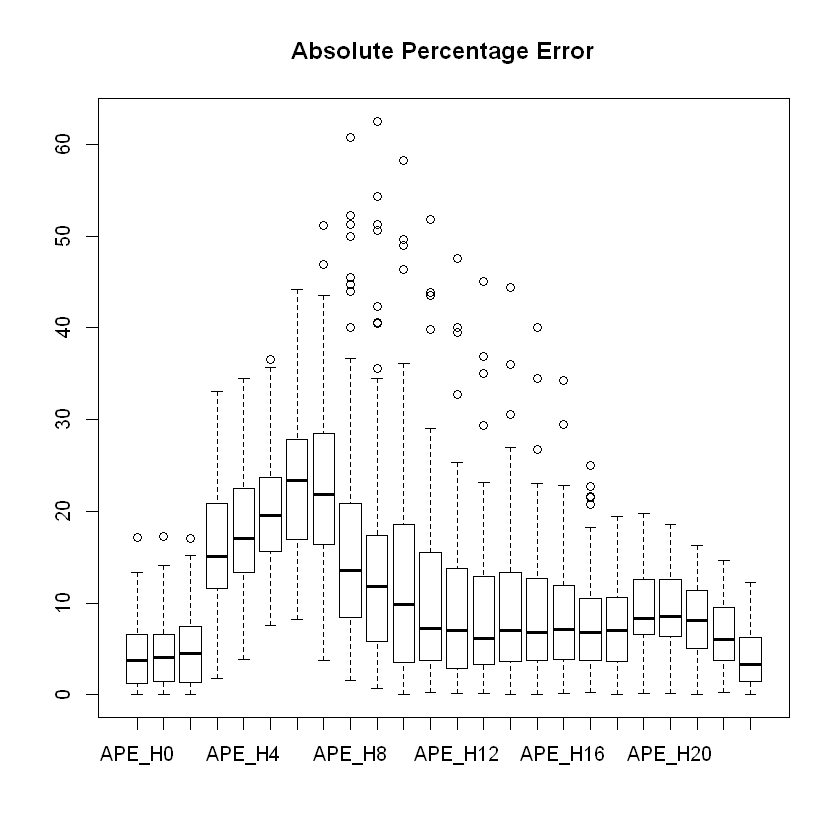

In [201]:
# Plot a boxplot for hourly APE
boxplot(wide_predicted[,50:73])
title("Absolute Percentage Error")

# Comments

From the box plot, first thing we see is that consumption is higher in the morning. When we chek the deviations we see that night hours has smaller deviation and less number of outliers than that of during the day.  
We can also say that when mean error increase in prediction, max error values and number of outliers also increase.

Side note: We are aware of that there might be a better way of writing some parts but we keep our focus on the result rather than the scripting language.